# Machine Learning: Assignment 2

Name:  Hunter Reilly<br />
Class: Machine Learning (CSCI 191T)<br />
Due:   2/25/18<br />
Group: 4Loop

## Imports
We start with the basic imports

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Aquiring the Data
Next, we aquire the data files needed to run our analysis

In [2]:
train_df = pd.read_csv('input/train.csv')
test_df = pd.read_csv('input/test.csv')
combine = [train_df, test_df]

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


## Sample of Data Head

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Sample of Data Tail

In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Info on Train and Test

In [6]:
print('*'*40)
train_df.info()
print('*'*40)
test_df.info()
print('*'*40)

****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 n

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Looking for Correlations
Now, we looked for correlations in the data

In [8]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
train_df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [11]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


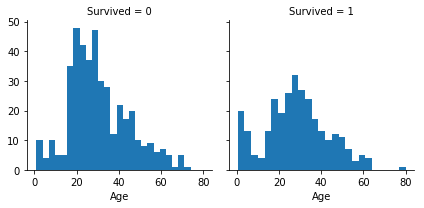

In [12]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', alpha=1, bins=25)

## Analyses

We can see that females, children, and those of a higher class survived at a greater rate than other groups

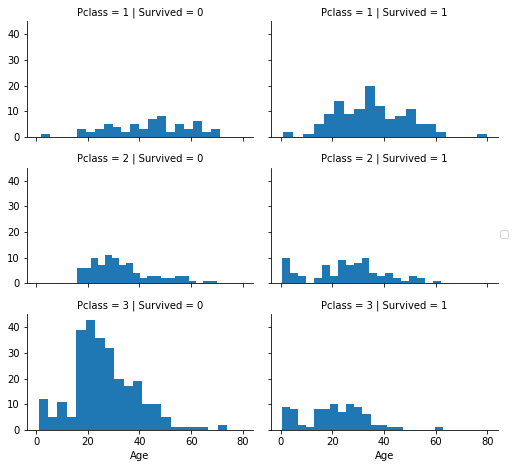

In [13]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=1, bins=20)
grid.add_legend();

## Adjust the Data
Since Ticket, Cabin, and Name are not useful to our model, we drop them.

In [14]:
train_df = train_df.drop(['Ticket', 'Cabin','Name'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin','Name'], axis=1)
combine = [train_df, test_df]

In [15]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


Now, we train the data to have more numerical representation. We first adjust the "Sex" tag

In [16]:
train_df.loc[train_df["Sex"]=="male","Sex"] = 0
train_df.loc[train_df["Sex"]=="female","Sex"] = 1

test_df.loc[test_df["Sex"]=="male","Sex"] = 0
test_df.loc[test_df["Sex"]=="female","Sex"] = 1

Next, we adjust the "Embarked" tag

In [17]:
train_df.loc[train_df["Embarked"]=="S","Embarked"] = 0
train_df.loc[train_df["Embarked"]=="C","Embarked"] = 1
train_df.loc[train_df["Embarked"]=="Q","Embarked"] = 2

test_df.loc[test_df["Embarked"]=="S","Embarked"] = 0
test_df.loc[test_df["Embarked"]=="C","Embarked"] = 1
test_df.loc[test_df["Embarked"]=="Q","Embarked"] = 2

A quick sample shows the adjustments

In [18]:
train_df.sample(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
859,860,0,3,0,NaN,0,0,7.2292,1
478,479,0,3,0,22.00,0,0,7.5208,0
86,87,0,3,0,16.00,1,3,34.3750,0
122,123,0,2,0,32.50,1,0,30.0708,1
467,468,0,1,0,56.00,0,0,26.5500,0
644,645,1,3,1,0.75,2,1,19.2583,1
724,725,1,1,0,27.00,1,0,53.1000,0
613,614,0,3,0,NaN,0,0,7.7500,2
846,847,0,3,0,NaN,8,2,69.5500,0
395,396,0,3,0,22.00,0,0,7.7958,0


## Null Adjustments

Now, let's adjust for null values in the "Embarked" and "Age" areas. To do this, we will take the averaged "Age" value and replace the null values with these values instead. For "Embarked", since there are only a couple null values, we can set an arbitrary value to the null "Embarked" values.

In [19]:
averageAge=train_df.Age.mean()
train_df.Age=train_df.Age.fillna(value=averageAge)

averageAge=test_df.Age.mean()
test_df.Age=test_df.Age.fillna(value=averageAge)

In [20]:
train_df.Embarked=train_df.Embarked.fillna(value=0)

test_df.Embarked=test_df.Embarked.fillna(value=0)

"Fare" also has some null values. For this, we will do what we did for the "Age" and take the average fair.

In [21]:
averageFare=train_df.Fare.mean()
train_df.Fare=train_df.Fare.fillna(value=averageFare)

averageFare=test_df.Fare.mean()
test_df.Fare=test_df.Fare.fillna(value=averageFare)

Let's see how it's looking!

In [22]:
train_df.sample(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
177,178,0,1,1,50.000000,0,0,28.7125,1
352,353,0,3,0,15.000000,1,1,7.2292,1
684,685,0,2,0,60.000000,1,1,39.0000,0
718,719,0,3,0,29.699118,0,0,15.5000,2
393,394,1,1,1,23.000000,1,0,113.2750,1
340,341,1,2,0,2.000000,1,1,26.0000,0
334,335,1,1,1,29.699118,1,0,133.6500,0
367,368,1,3,1,29.699118,0,0,7.2292,1
573,574,1,3,1,29.699118,0,0,7.7500,2
710,711,1,1,1,24.000000,0,0,49.5042,1


In [23]:
test_df.sample(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
223,1115,3,0,21.00000,0,0,7.7958,0
171,1063,3,0,27.00000,0,0,7.2250,1
305,1197,1,1,64.00000,1,1,26.5500,0
115,1007,3,0,18.00000,1,0,14.4542,1
137,1029,2,0,26.00000,0,0,13.0000,0
163,1055,3,0,30.27259,0,0,7.0000,0
80,972,3,0,6.00000,1,1,15.2458,1
374,1266,1,1,54.00000,1,1,81.8583,0
331,1223,1,0,39.00000,0,0,29.7000,1
247,1139,2,0,42.00000,1,1,32.5000,0


## Model
Now that our null values are taken care of, we can run the model.

In [24]:
X_train = train_df.drop(["Survived","PassengerId"], axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

In [25]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

98.2

## Final Score

For our data model, we get a score of 98.2. Now we just have to export the output and submit it to Kaggle.

In [26]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('output/submission.csv', index=False)

# END